# Advanced regression housing price assignment
    Submitted by Asmar Zia

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression.

### Objective
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


### Step 1 : Importing packages

In [57]:
#import the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Step 2 : Loading data and understanding

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [2]:
train_db = pd.read_csv('train.csv')
train_db.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train_db.shape)
train_db.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [4]:
train_db.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 3 : Data Cleaning
3.1 Drop columns that are not needed

In [4]:
# Lets handle null and missing values
print(train_db.isnull().sum())
null_values_per = pd.DataFrame(round(train_db.isnull().sum()/len(train_db.index)*100,2).sort_values(ascending = False),columns=["% Null"])
null_values_per.index.name = 'Columns'
null_values_per

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

,% Null
Columns,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


#### Keeping 15% as threshold of null values, We will drop columns with more than 15% of null values. Also lets drop ID since its just an index


In [10]:
# Lets drop 'PoolQC','MiscFeature','Alley','Fence' and 'FireplaceQu'column since ~50% values are null
# Also we will drop the ID since it just an index 
train_db_new = train_db.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','Id'],axis=1)
print(train_db.shape)
print(train_db_new.shape)

(1460, 81)
(1460, 74)


In [11]:
# rechecking the % null values 
null_values_per = pd.DataFrame(round(train_db_new.isnull().sum()/len(train_db_new.index)*100,2).sort_values(ascending = False),columns=["% Null"])
null_values_per.index.name = 'Columns'
null_values_per

,% Null
Columns,
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53
BsmtCond,2.53


### Step 4 : Derived columns and EDA
4.1 Lets creat the age columns using Year and Garage columns

In [12]:
train_db_new['YearBuilt_Old'] = train_db_new.YearBuilt.max()-train_db_new.YearBuilt
train_db_new['YearRemodAdd_Old'] = train_db_new.YearRemodAdd.max()-train_db_new.YearRemodAdd
train_db_new['GarageYrBlt_Old'] = train_db_new.GarageYrBlt.max()-train_db_new.GarageYrBlt
train_db_new['YrSold_Old'] = train_db_new.YrSold.max()-train_db_new.YrSold
train_db_new[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
568,1983,2009,1983.0,2009,27,1,27.0,1
676,1900,1950,1920.0,2006,110,60,90.0,4
417,1918,1950,1918.0,2007,92,60,92.0,3
218,1939,2006,1939.0,2008,71,4,71.0,2
366,1963,1963,1963.0,2009,47,47,47.0,1
295,1984,1984,1984.0,2006,26,26,26.0,4
1361,2005,2005,2005.0,2009,5,5,5.0,1
241,1945,1997,NaN,2007,65,13,NaN,3
1443,1916,1950,1916.0,2009,94,60,94.0,1
110,1954,1972,1954.0,2006,56,38,56.0,4


In [14]:
# since we have derived the above columns using year and garage columns lets drop the orignal ones
train_db_new = train_db_new.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)
train_db_new.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,10,10,10.0,2


In [15]:
train_db_new.shape

(1460, 74)

In [16]:
# lets add the missing values for the columns with 0-15% null values 
train_db_new.BsmtCond.fillna('TA',inplace=True)
train_db_new.BsmtExposure.fillna('No',inplace=True)
train_db_new.BsmtFinType1.fillna('Unf',inplace=True)
train_db_new.BsmtFinType2.fillna('Unf',inplace=True)
train_db_new.GarageType.fillna('Attchd',inplace=True)
train_db_new.GarageYrBlt_Old.fillna(-1,inplace=True)
train_db_new.GarageFinish.fillna('Unf',inplace=True)
train_db_new.GarageQual.fillna('TA',inplace=True)
train_db_new.GarageCond.fillna('TA',inplace=True)
train_db_new.MasVnrType.fillna('None',inplace=True)
train_db_new.MasVnrArea.fillna(train_db_new.MasVnrArea.mean(),inplace=True)
train_db_new.BsmtQual.fillna('TA',inplace=True)

In [17]:
# lets analyise the values counts of all columns in the db
train_db_new.columns
columns = ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'YearBuilt_Old',
       'YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old']

for col in columns :
    print(train_db_new[col].value_counts())


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilb

In [21]:
# as we can see from the above of that streets and utilities variable have very little vairance in them hence lets frop them
train_db_new = train_db_new.drop(['Street','Utilities'],axis=1)
train_db_new.shape


(1460, 72)

In [22]:
# let us see the variance in non-object columns
train_db_new[list(train_db_new.dtypes[train_db_new.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


<Figure size 1080x2160 with 0 Axes>

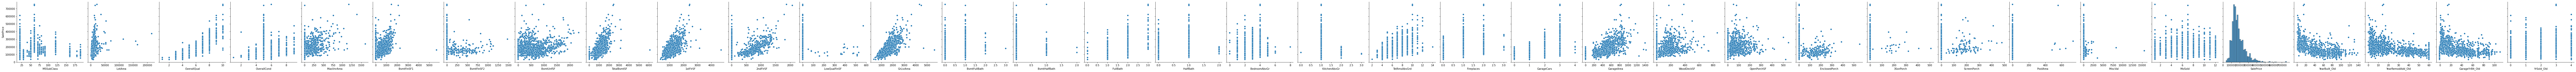

In [35]:
#scatter plot for non-object independent variables
columns_plot = list(train_db_new.dtypes[train_db_new.dtypes!='object'].index)
plt.figure(figsize = (15,30))
sns.pairplot(train_db_new, x_vars=columns_plot, y_vars='SalePrice',size=4, aspect=1, kind='scatter')
plt.show()

#### From the above scatter plot below independent variables have a good relationship with the dependent variable 
1. MasVnrArea 
2. TotalBsmtSF
3. 1stFlrSF
4. 2ndFlrSF
5. WoodDeckSF
6. BsmntFinSF1
7. GrlivArea
8. GarageArea

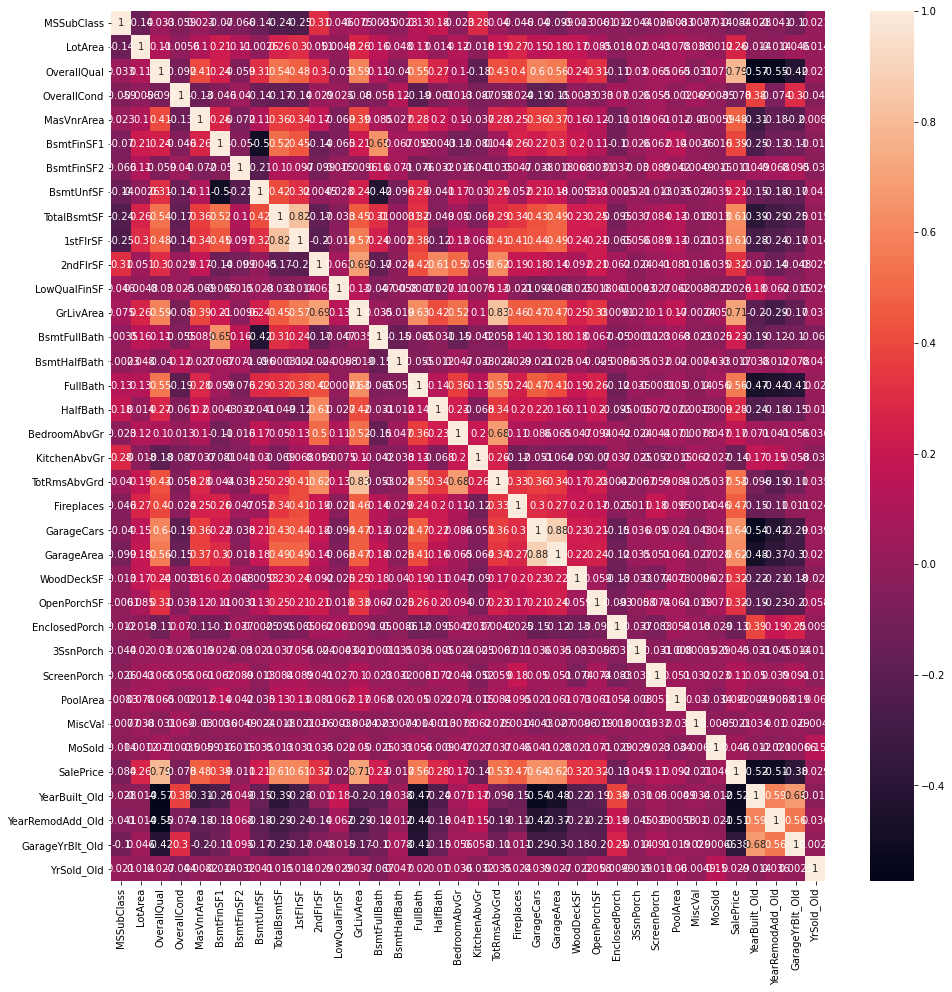

In [36]:
# Lets plot a heat of the non-object independent variables 
plt.figure(figsize=(16,16))
sns.heatmap(train_db_new[list(train_db_new.dtypes[train_db_new.dtypes!='object'].index)].corr(),annot=True)
plt.show()

### Lets remove the outliers with lower quintile as 25% and upper quintile as 99% 

In [46]:
columns_plot = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in columns_plot:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

train_db_outliered = drop_outliers(train_db_new)

In [48]:
train_db_outliered.shape

(1441, 72)

In [49]:
train_db_outliered[list(train_db_outliered.dtypes[train_db_outliered.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [50]:
# based on the value counts we can see that below columns have an order and we can asign value to them
train_db_outliered[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()


,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [51]:
train_db_outliered['LandSlope'] = train_db_outliered.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
train_db_outliered['ExterQual'] = train_db_outliered.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_db_outliered['BsmtQual'] = train_db_outliered.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_db_outliered['BsmtCond'] = train_db_outliered.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_db_outliered['BsmtExposure'] = train_db_outliered.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
train_db_outliered['BsmtFinType1'] = train_db_outliered.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_db_outliered['BsmtFinType2'] = train_db_outliered.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train_db_outliered['HeatingQC'] = train_db_outliered.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_db_outliered['CentralAir'] = train_db_outliered.CentralAir.map({'N':0,'Y':1})
train_db_outliered['KitchenQual'] = train_db_outliered.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_db_outliered['GarageFinish'] = train_db_outliered.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
train_db_outliered['GarageQual'] = train_db_outliered.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_db_outliered['GarageCond'] = train_db_outliered.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train_db_outliered['ExterCond'] = train_db_outliered.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train_db_outliered['LotShape'] = train_db_outliered.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [52]:
train_db_outliered[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [53]:
# for the remaining columns we will creat dummy variables and merge into the actual data set
dummy_col = pd.get_dummies(train_db_outliered[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

train_db_outliered = pd.concat([train_db_outliered,dummy_col],axis='columns')

train_db_outliered = train_db_outliered.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

train_db_outliered.head()  

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,0,0,0,0,2,208500,7,7,7.0,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,0,0,0,0,5,181500,34,34,34.0,3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0

In [78]:
# realsing that we have not removed the months old column since its no longer required 
train_db_outliered = train_db_outliered.drop(['MoSold'],axis='columns')

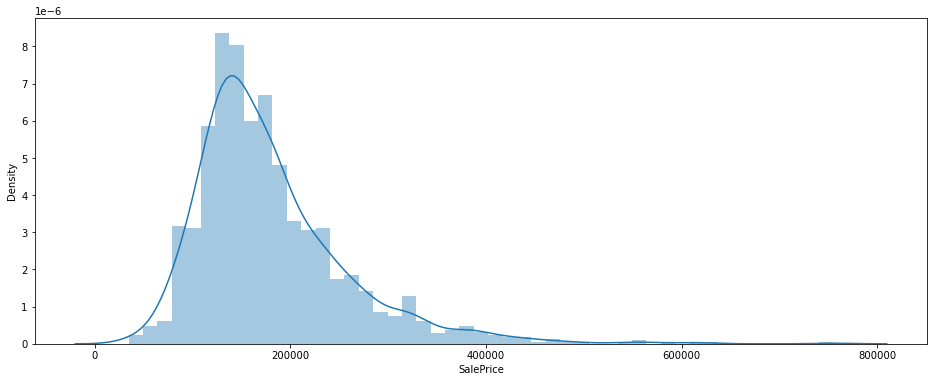

In [79]:
# Lets plot the distibution graph for Sales before me move to modelling step 
plt.figure(figsize=(16,6))
sns.distplot(train_db_outliered.SalePrice)
plt.show()


### Step 4 : Model execution

In [80]:
# lets 1st create the training and test data sets
db_train,db_test = train_test_split(train_db_outliered,train_size=0.7,test_size=0.3,random_state=42)

In [81]:
# Scaling the train dataset and since the due to variation in SalePrice w.r.t to indpendent variables we scale that as well 
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
db_train[num_col] = scaler.fit_transform(db_train[num_col])
db_test[num_col] = scaler.transform(db_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

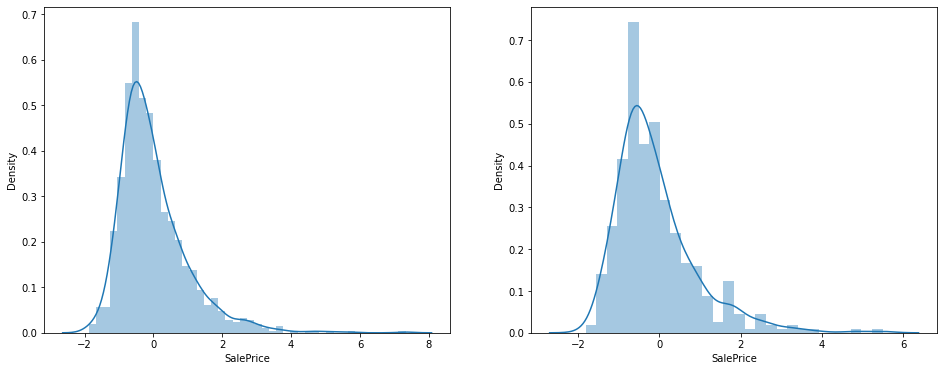

In [82]:
# rechecking the distribution after scalling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(db_train.SalePrice)
plt.subplot(122)
sns.distplot(db_test.SalePrice)

In [83]:
# We will split the data sets into dependent and independet variables 
y_train = db_train.pop('SalePrice')
X_train = db_train

In [84]:
y_test = db_test.pop('SalePrice')
X_test = db_test

In [85]:
print(X_train.shape)
print(X_test.shape)

(1008, 192)
(433, 192)


#### We will use RFE directly as 192 variables with ~5 fold will create 960 fits and it will take alot of time ~ 1hr so using RFE directly

In [86]:
len(X_train.columns)

192

In [87]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [88]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['OverallQual',
 'MasVnrArea',
 'ExterQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenQual',
 'GarageArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Low',
 'LotConfig_CulDSac',
 'Neighborhood_Blueste',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_RRAn',
 'Condition2_PosN',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofStyle_Gable',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_Stucco',
 'Exterior1st_Wd Sdng',
 '

In [89]:
# Filtering the training and test data set with rfe selected columns 
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### 4.1 Starting Lasso regression model 1st

In [90]:
lm_lasso = Lasso(alpha=0.001)
lm_lasso.fit(X_train,y_train)

y_train_pred = lm_lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm_lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8993064549070777
0.8495648010458793


In [91]:
model_parameter = list(lm_lasso.coef_)
model_parameter.insert(0,lm_lasso.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = db_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.153),
 ('LotArea', 0.205),
 ('LotShape', 0.101),
 ('LandSlope', 0.153),
 ('OverallQual', 0.148),
 ('OverallCond', 0.042),
 ('MasVnrArea', -0.0),
 ('ExterQual', 0.071),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.007),
 ('BsmtCond', -0.023),
 ('BsmtExposure', 0.308),
 ('BsmtFinType1', 0.145),
 ('BsmtFinSF1', 0.099),
 ('BsmtFinType2', 0.041),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.118),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', -0.019),
 ('CentralAir', 0.195),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', -0.053),
 ('LowQualFinSF', 0.213),
 ('GrLivArea', -0.136),
 ('BsmtFullBath', -0.141),
 ('BsmtHalfBath', -0.165),
 ('FullBath', -0.121),
 ('HalfBath', 0.219),
 ('BedroomAbvGr', 0.393),
 ('KitchenAbvGr', -0.13),
 ('KitchenQual', -0.076),
 ('TotRmsAbvGrd', -0.082),
 ('Fireplaces', 0.204),
 ('GarageFinish', 0.102),
 ('GarageCars', 0.063),
 ('GarageArea', -2.102),
 ('GarageQual', -0.261),
 ('GarageCond', -0.206),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', -0.176),
 ('EnclosedPorch', -0.065),
 ('3

#### Using GridsearchCV to improve the model by finding the optimatl value of alpha


In [92]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [93]:
cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.020118,0.001989,0.001427,0.000152,0.001,{'alpha': 0.001},0.847797,0.905763,0.838761,0.878855,0.907505,0.890756,0.903218,0.497074,0.892099,0.933448,0.849528,0.120484,1,0.902364,0.897719,0.904352,0.900897,0.897880,0.899629,0.897768,0.910367,0.900374,0.896390,0.900774,0.003934
1,0.003578,0.000468,0.001373,0.000557,0.010,{'alpha': 0.01},0.812901,0.863279,0.835581,0.832990,0.871562,0.853867,0.875660,0.418559,0.869551,0.925440,0.815939,0.135573,2,0.848494,0.844136,0.847094,0.844801,0.843239,0.842931,0.842151,0.875629,0.845532,0.840392,0.847440,0.009659
2,0.002302,0.000105,0.001060,0.000052,0.100,{'alpha': 0.1},0.737558,0.818260,0.772405,0.755166,0.817468,0.792222,0.818180,0.526480,0.834435,0.882284,0.775446,0.091891,3,0.797799,0.791007,0.789925,0.797497,0.792001,0.793017,0.787020,0.823363,0.792932,0.787837,0.795240,0.009959
3,0.002026,0.000100,0.001215,0.000431,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011498,0.011066,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001939,0.000022,0.001053,0.000024,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,-0.000764,-0.003163,-0.007068,-0.037754,-0.004667,-0.014282,-0.011498,0.011066,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


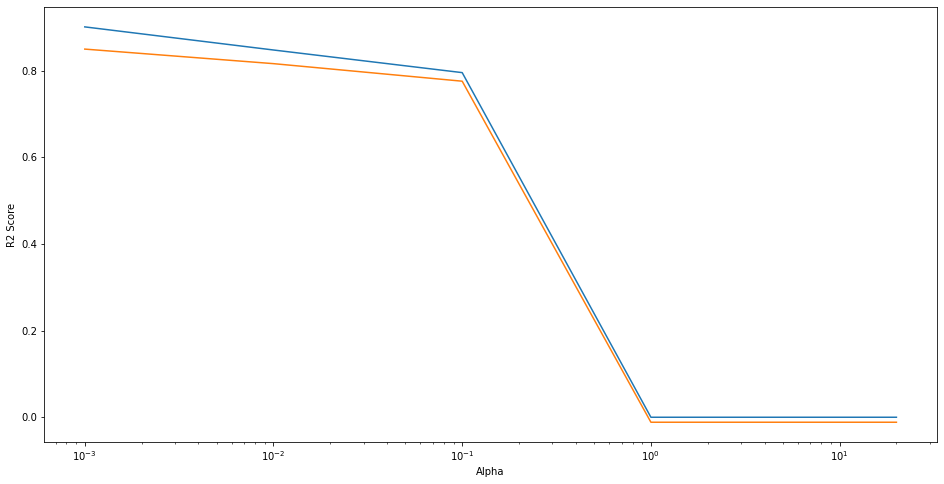

In [94]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [95]:
model_cv.best_params_

{'alpha': 0.001}

In [96]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8993064549070777
0.8495648010458793


In [97]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = db_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [99]:
lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
46,YearRemodAdd_Old,1.537061
28,BedroomAbvGr,0.393485
68,Neighborhood_IDOTRR,0.354730
11,BsmtExposure,0.308146
27,HalfBath,0.219122
22,LowQualFinSF,0.213182
1,LotArea,0.205325
32,Fireplaces,0.203741
19,CentralAir,0.195104
47,GarageYrBlt_Old,0.164028


#### Using Ridge regression now 

In [100]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9051416781339434
0.8377819414739788


In [101]:
# to handle to the overfitting in the above model
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,15.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 15.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [102]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003413,0.002356,0.001380,0.000361,0.001,{'alpha': 0.001},0.846929,0.906527,0.799364,0.883978,0.901356,0.887166,0.901760,0.584484,0.880166,0.930929,0.852266,0.095670,8,0.908027,0.903961,0.911142,0.906927,0.904076,0.905550,0.904067,0.916246,0.906140,0.902212,0.906835,0.003944
1,0.002531,0.000446,0.001331,0.000483,0.010,{'alpha': 0.01},0.847579,0.906478,0.801979,0.883931,0.901571,0.887211,0.901868,0.583877,0.880461,0.930979,0.852593,0.095722,6,0.908026,0.903960,0.911139,0.906926,0.904075,0.905549,0.904066,0.916245,0.906139,0.902211,0.906834,0.003944
2,0.002173,0.000147,0.001099,0.000073,0.100,{'alpha': 0.1},0.851981,0.905962,0.823741,0.883484,0.903354,0.887629,0.902733,0.578228,0.883030,0.931425,0.855157,0.096595,5,0.907925,0.903879,0.910844,0.906851,0.903991,0.905469,0.903978,0.916205,0.906052,0.902131,0.906733,0.003931
3,0.002179,0.000138,0.001079,0.000036,0.200,{'alpha': 0.2},0.854441,0.905344,0.840921,0.883034,0.904770,0.888036,0.903373,0.572709,0.885295,0.931839,0.856976,0.097928,4,0.907696,0.903677,0.910166,0.906662,0.903780,0.905271,0.903762,0.916106,0.905837,0.901931,0.906489,0.003910
4,0.002442,0.000192,0.001423,0.000678,0.500,{'alpha': 0.5},0.856943,0.903375,0.868754,0.881889,0.907193,0.889004,0.904252,0.559521,0.889959,0.932784,0.859367,0.101957,3,0.906684,0.902703,0.907412,0.905738,0.902777,0.904311,0.902734,0.915646,0.904794,0.900960,0.905376,0.003916


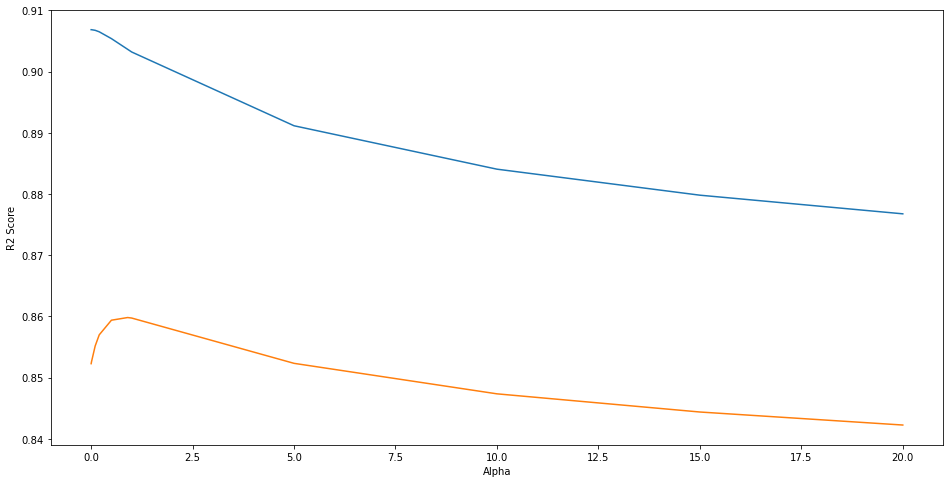

In [103]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [104]:
model_cv.best_params_

{'alpha': 0.9}

In [105]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9025832902579617
0.8462418133756207


In [106]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = db_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [107]:
ridge_coef.sort_values(by='Coef',ascending=False).head(20)

,Feaure,Coef
46,YearRemodAdd_Old,1.519350
68,Neighborhood_IDOTRR,0.419181
28,BedroomAbvGr,0.412118
16,BsmtUnfSF,0.305200
42,ScreenPorch,0.289622
32,Fireplaces,0.284222
14,BsmtFinType2,0.255698
27,HalfBath,0.233383
22,LowQualFinSF,0.222656
56,LotConfig_CulDSac,0.218432


### Step 5 : Model evaluation 

#### As we can see that R2 is not very different in both Lasso vs ridge but since lasso can help in feature elimination we will go ahead with lasso for this as final model 

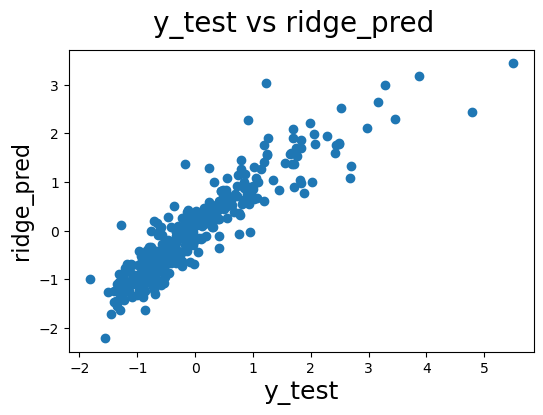

In [112]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
y_pred_test = ridge.predict(X_test)
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

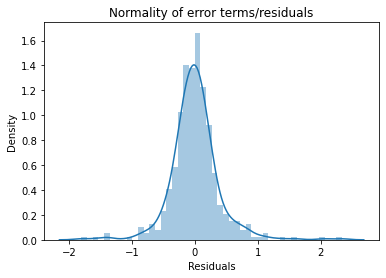

In [113]:
y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

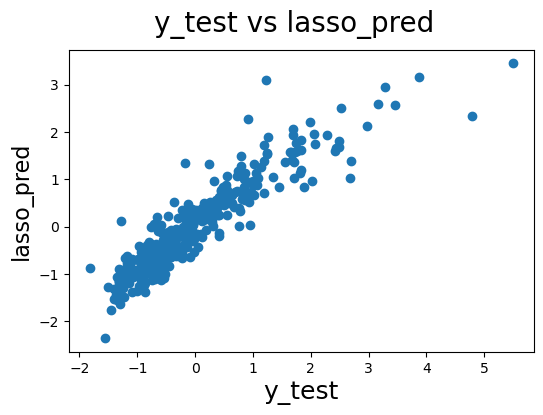

In [116]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
y_pred_test = lasso.predict(X_test)
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

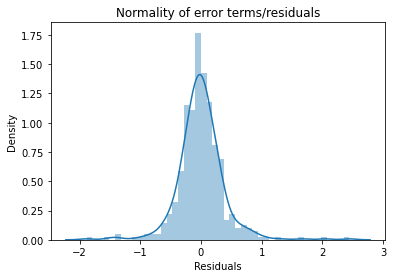

In [115]:
y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Final Model

In [117]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8993064549070777
0.8495648010458793


In [118]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = db_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
46,YearRemodAdd_Old,1.537061
28,BedroomAbvGr,0.393485
68,Neighborhood_IDOTRR,0.354730
11,BsmtExposure,0.308146
27,HalfBath,0.219122
22,LowQualFinSF,0.213182
1,LotArea,0.205325
32,Fireplaces,0.203741
19,CentralAir,0.195104
47,GarageYrBlt_Old,0.164028


# Q1-Which variables are significant in predicting the price of a house?

Answer- The below mentioned variables are significant in predicting the price

- LotArea------------- Lot size in square feet
- OverallQual--------Rates the overall material and finish of the house
- Year remodelled------When was the house remoddeled
- Central air -----  if the house has centrally airconditon or not
- Lot shape --- shape of the lot 
- Garage finish ---- how well was the garage finished 
- Bedrooms above grade ---- How many bedrooms were above grade 
- Basmentexposure ------ Refered to walkout or garden level walls 
- BsmtFinSF1-------Type 1 finished square feet

#  Q2 -How well those variables describe the price of a house

Answer-

               Ridge Regression  Lasso Regression

R2 score(Train)---------        0.89    ----------------------------0.90

R2 score(Test)-----------0.85-----------------------------0.86

# Problem Statement -Part 2

# Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#  Answer

 1. The optimal value of alpha for ridge and lasso regression

    Ridge Alpha 0.9

    lasso Alpha 0.001

#### Lasso regression

In [119]:
lasso = Lasso(alpha=0.003)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8855420709364761
0.8535892837185595


In [120]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = db_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
46,YearRemodAdd_Old,0.957820
28,BedroomAbvGr,0.327538
11,BsmtExposure,0.303621
68,Neighborhood_IDOTRR,0.255218
1,LotArea,0.226547
27,HalfBath,0.193278
22,LowQualFinSF,0.173267
3,LandSlope,0.171135
19,CentralAir,0.163679
12,BsmtFinType1,0.151173


For lasso R2 on train data set has decreased slightly but overall smiliar feature for predicting sales 

#### Ridge

In [121]:
ridge = Ridge(alpha = 2)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8986030851121051
0.851454486850955


In [122]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = db_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

ridge_coef.sort_values(by='Coef',ascending=False).head(20)

,Feaure,Coef
46,YearRemodAdd_Old,1.213377
28,BedroomAbvGr,0.392810
68,Neighborhood_IDOTRR,0.320476
32,Fireplaces,0.253473
16,BsmtUnfSF,0.236758
27,HalfBath,0.235810
22,LowQualFinSF,0.213767
19,CentralAir,0.200318
1,LotArea,0.194433
56,LotConfig_CulDSac,0.188631


For Ridge R2 on train data set has decreased slightly and increased in test data but overall smiliar feature for predicting sales 

# Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


 Answer:
        
The r2_score of lasso is slightly higher than ridge for the test/train dataset so we will choose lasso regression to solve this problem

# Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [128]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8993064549070777
0.8495648010458793


In [129]:
db_train_new = db_train.drop(['YearRemodAdd_Old','BedroomAbvGr','BsmtExposure','Neighborhood_IDOTRR','LotArea'],axis=1)
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = db_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
46,MSZoning_RH,1.537061
28,TotRmsAbvGrd,0.393485
68,Neighborhood_NWAmes,0.354730
11,BsmtFinSF1,0.308146
27,KitchenQual,0.219122
22,BsmtFullBath,0.213182
1,LotShape,0.205325
32,GarageArea,0.203741
19,2ndFlrSF,0.195104
47,MSZoning_RL,0.164028


Answer- The below mentioned variables top now

- MSZoning_RH
- Total rooms above garde
- Neighborhood_NWAmes
- BasmFinSF1
- kitchen quality  

# Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer

We need to check the test accrucracy and it should not be to far from the train. Model should also follow normalized distrubtion of error terms and outlier treatment should be taken care and only the relevant values should be retained before running the model